https://highway-env.farama.org/quickstart/#quickstart

In [1]:
!pip install highway_env

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 2.4 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import highway_env

env = gym.make(
    "merge-v0",
    render_mode="rgb_array",
    config={
        "controlled_vehicles": 2,
        "vehicles_count": 3,
        "observation": {
            "type": "MultiAgentObservation",
            "observation_config": {"type": "Kinematics"}
        },
        "action": {
            "type": "MultiAgentAction",
            "action_config": {"type": "DiscreteMetaAction"}
        }
    }
)

obs, info = env.reset(seed=0)


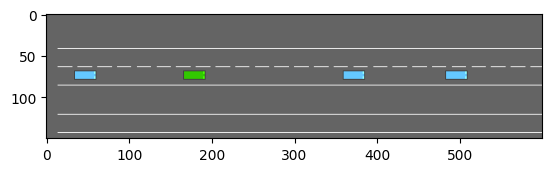

In [3]:
from matplotlib import pyplot as plt

plt.imshow(env.render())
plt.show()

In [4]:
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import gymnasium
import highway_env
from stable_baselines3 import DQN

env = gymnasium.make("highway-fast-v0")
model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")
model.learn(int(1e3))
model.save("highway_dqn/model")

# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = truncated = False
  obs, info = env.reset()
  while not (done or truncated):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to highway_dqn/DQN_2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11       |
|    ep_rew_mean      | 7.95     |
|    exploration_rate | 0.582    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 7        |
|    time_elapsed     | 6        |
|    total_timesteps  | 44       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.6     |
|    ep_rew_mean      | 9.36     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 12       |
|    time_elapsed     | 8        |
|    total_timesteps  | 101      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 12.1     |
| 

/usr/local/lib/python3.11/dist-packages/highway_env/envs/common/observation.py:228: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = utils.lmap(df[feature], [f_range[0], f_range[1]], [-1, 1])
/usr/local/lib/python3.11/dist-packages/highway_env/envs/common/observation.py:230: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.clip(df[feature], -1, 1)
/usr/local/lib/python3.11/dist-packages/highway_env/envs/common/observation.py:228: SettingWithCopyWarning: 
A value is trying to be set 

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.3     |
|    ep_rew_mean      | 8.99     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 84       |
|    fps              | 19       |
|    time_elapsed     | 48       |
|    total_timesteps  | 949      |
| train/              |          |
|    learning_rate    | 0.0005   |
|    loss             | 0.36     |
|    n_updates        | 748      |
----------------------------------


/usr/local/lib/python3.11/dist-packages/highway_env/envs/common/abstract.py:292: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("highway-fast-v0", render_mode="rgb_array")
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/highway_env/envs/common/abstract.py:292: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("highway-fast-v0", render_mode="rgb_array")
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/highway_env/envs/common/abstract.py:292: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("highway-fast-v0", render_mode="rgb_array")
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/highway_env/envs/common/abstract.py:292: UserWarning: WARN: You are calling re

In [ ]:
from gymnasium.wrappers import RecordVideo
import os

# Create folder to save the video
video_folder = "./video"
os.makedirs(video_folder, exist_ok=True)

# Wrap the environment with RecordVideo
env = gym.make(env_id, render_mode='rgb_array')
env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda e: True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

state, _ = env.reset()
state = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
episode_reward = 0
done = False

while not done:
    with torch.no_grad():
        action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, _ = env.step(action)

env.close()